In [10]:
import sys
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('/home/michaelwilliams/git_repos/Accelerating-GWPE/nn/')
print(sys.path[-1])

/home/michaelwilliams/git_repos/Accelerating-GWPE/nn/


In [2]:
from gwfa.data import Data

/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaelwilliams/.mi

Setting up Keras to use GPU with miminal memory on 0




In [3]:
data = Data("./mount_dir/", fname="grid_samples.dat")

Columns in data:
Name: luminosity_distance  Min: 100.00000 Max: 5000.00000 Mean: 2550.00000
Name: mass_1               Min:   5.00000 Max: 100.00000 Mean:  52.50000
Name: mass_2               Min:   5.00000 Max: 100.00000 Mean:  52.50000
Name: theta_jn             Min:   0.00000 Max:   3.14159 Mean:   1.57080
Name: logL                 Min: -346060.55038 Max: -8086.05542 Mean: -14771.04734
Name: logPrior             Min:   0.00000 Max:   0.00000 Mean:   0.00000


In [4]:
data.prep_data_chain(block_size=-1, norm_logL=False, norm_intrinsic=False, norm_extrinsic=False)

Intrinsic parameters in data:  ['mass_1', 'mass_2']
Extrinsic parameters in data:  ['luminosity_distance', 'theta_jn']
Number of data points: 10000
Block size: 10000
Number of blocks: 1
X shape: (1, 10000, 2) (1, 10000, 2)
Y shape: (1, 10000)


In [5]:
data.intrinsic_parameters[0]

array([[  5.,   5.],
       [  5.,   5.],
       [  5.,   5.],
       ...,
       [100., 100.],
       [100., 100.],
       [100., 100.]])

In [34]:
from scipy.special import logsumexp
def elu(x, alpha=0.01):
    y = x.copy()
    neg_indices = np.where(x <= 0)
    y[neg_indices] = alpha * (logsumexp(x) - 1.)
    return y

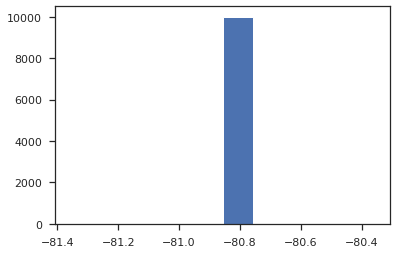

In [37]:
plt.hist(elu(data.logL[0]))
plt.show()

In [7]:
plt.plot(data.intrinsic_parameters[0,:,0], data.intrinsic_parameters[0,:,1], '.')
plt.show()

/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


In [8]:
x = data.extrinsic_parameters[0,:,0]
y = data.extrinsic_parameters[0,:,1]
z = data.logL[0]
print(x.shape, y.shape, z.shape)
plt.tricontourf(x, y, z, 30)
plt.colorbar()
plt.show()

(10000,) (10000,) (10000,)


/home/michaelwilliams/.miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  import sys
